In [49]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv("concrete_data.csv")
x_train,x_test,y_train,y_test = train_test_split(df.drop("Strength",axis=1),df["Strength"],test_size=0.2,random_state=42)

<h3>Make qq and kde plot for all columns</h3>

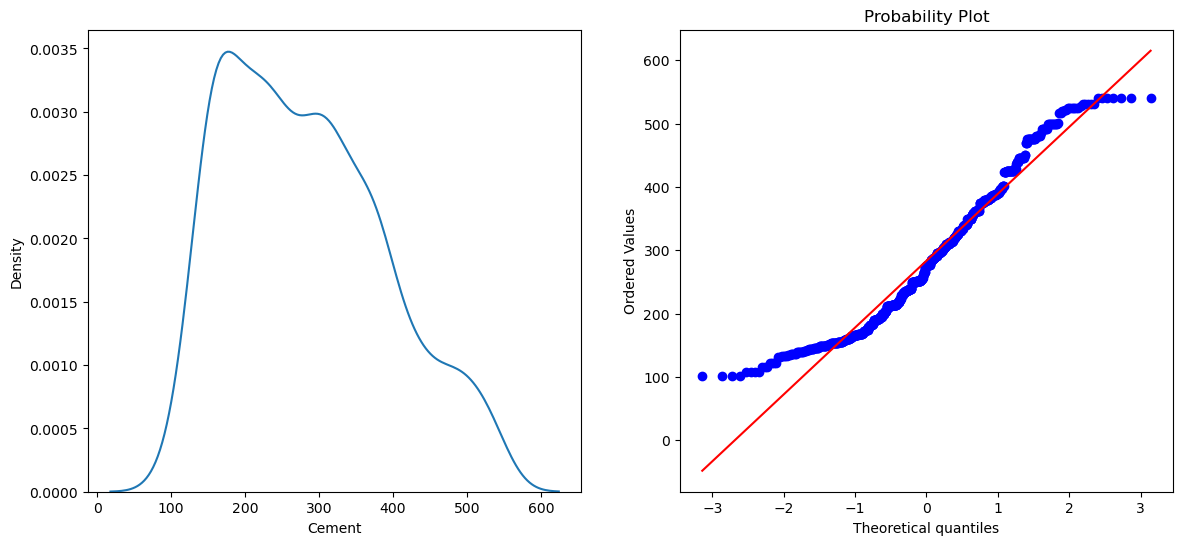

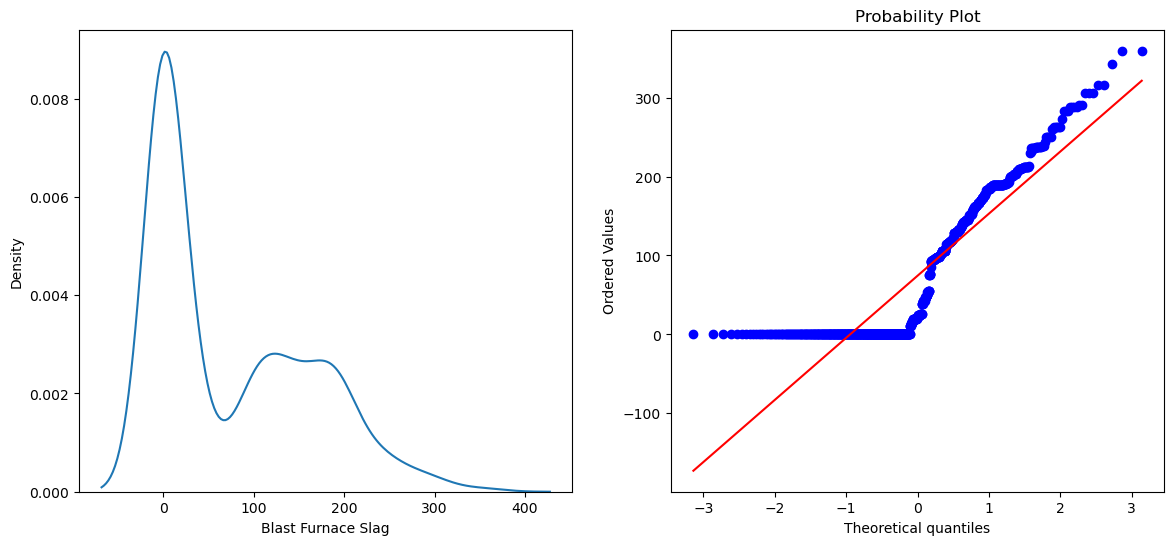

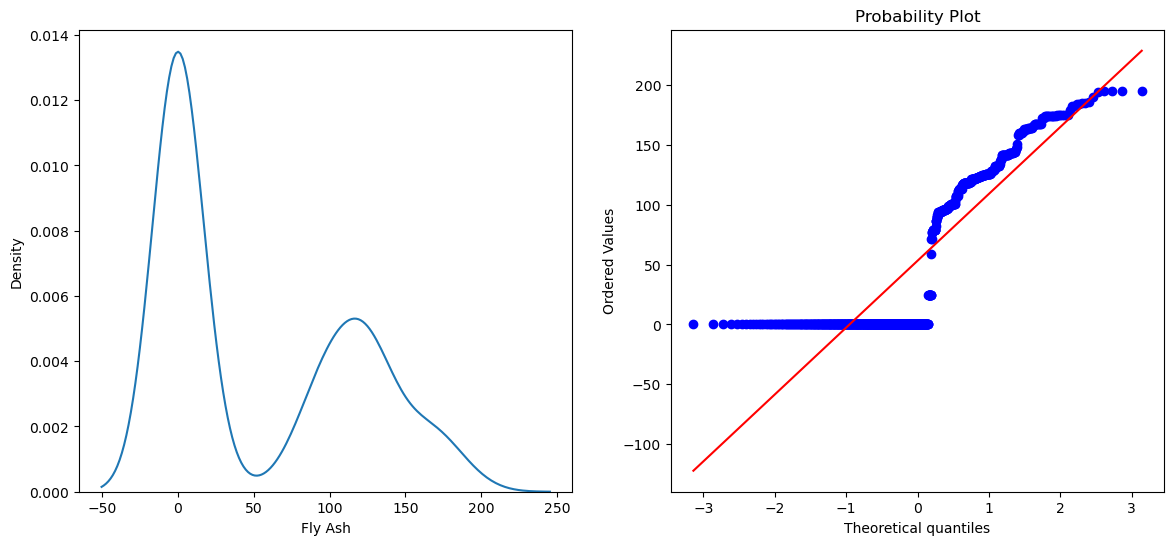

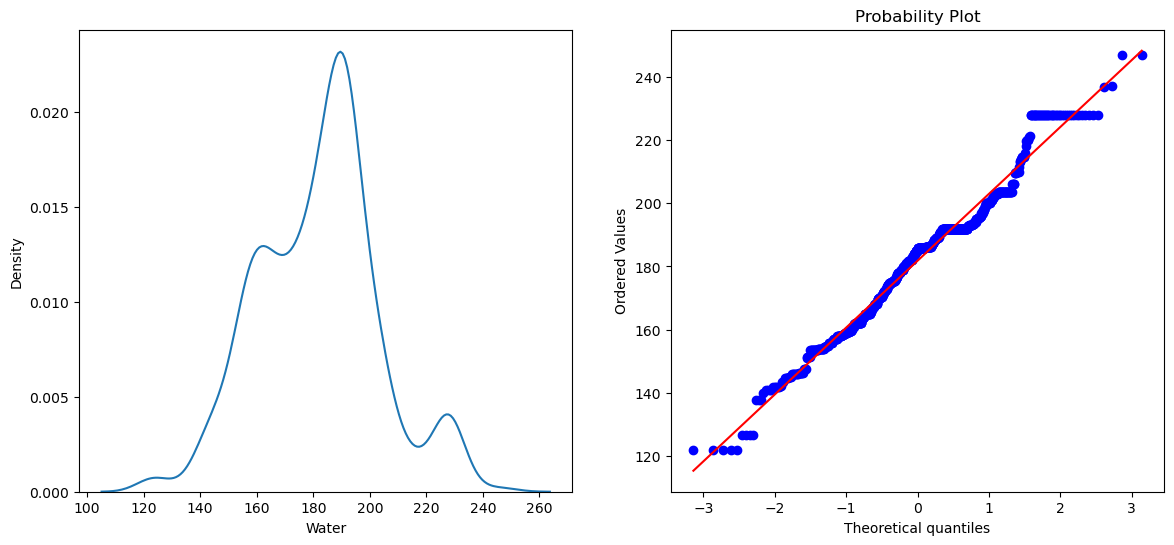

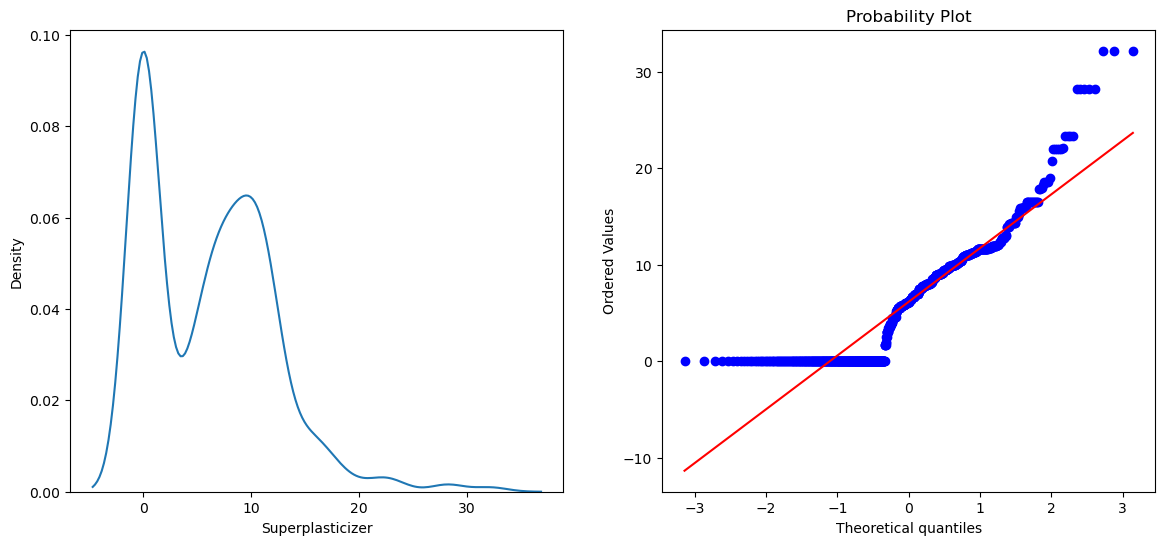

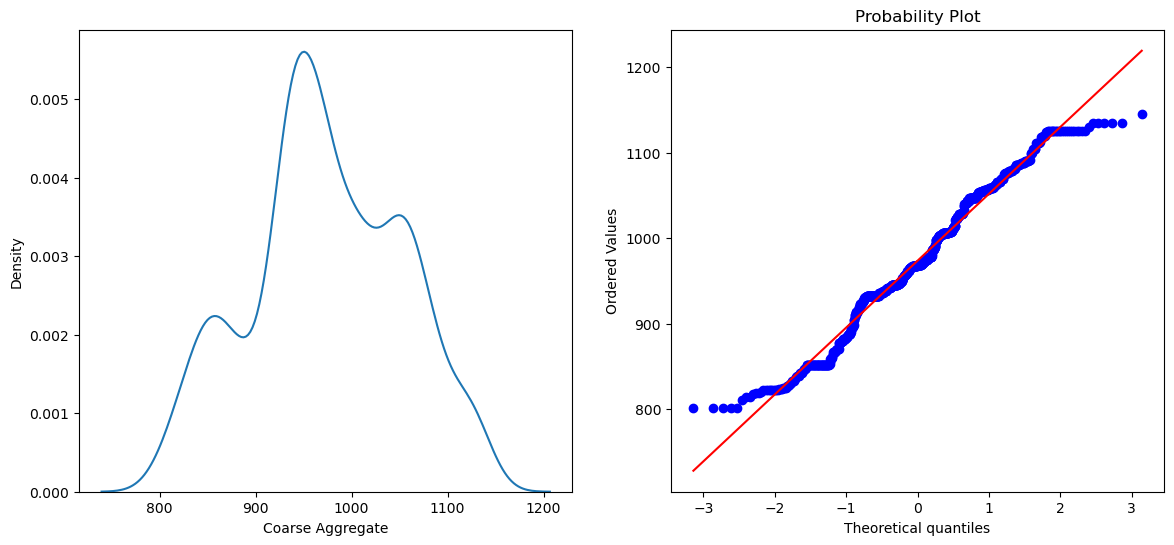

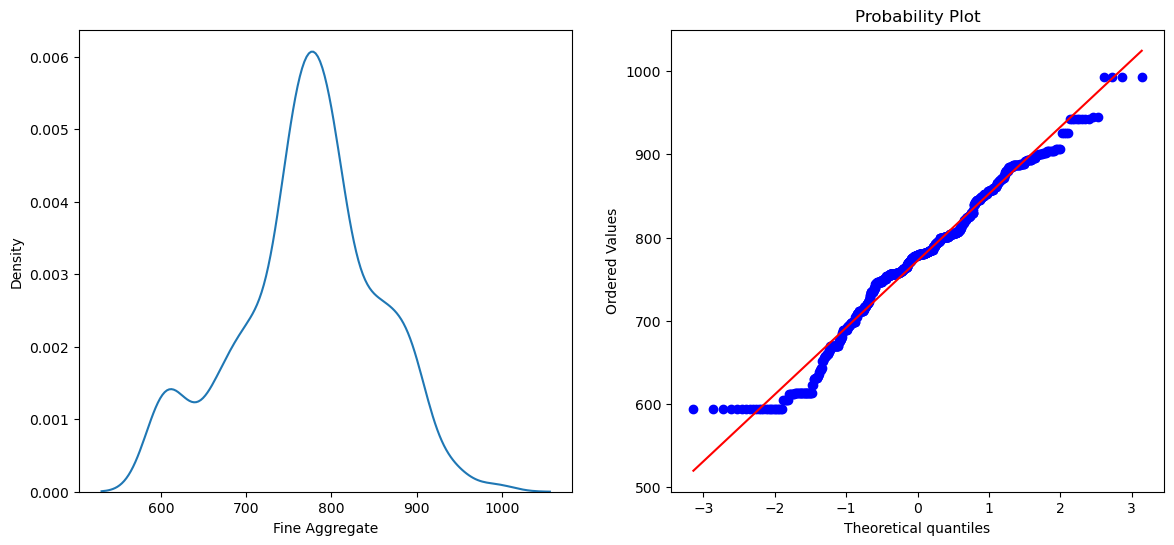

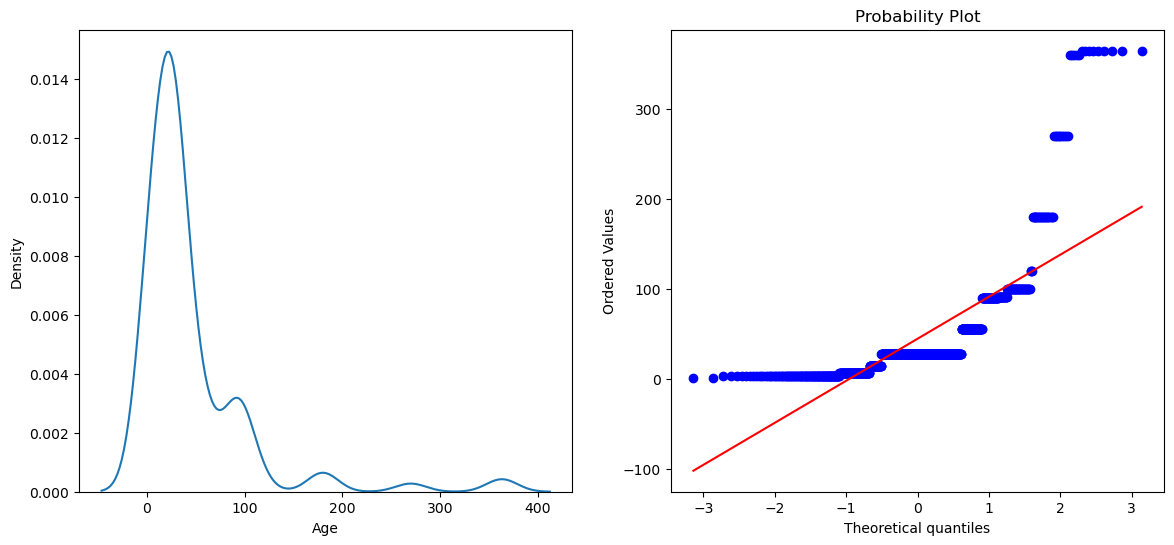

In [35]:
for v in x_train.columns:
   fig,[ax1,ax2]= plt.subplots(ncols=2,figsize=(14,6))
   sns.kdeplot(x_train[v],ax=ax1)
   stats.probplot(x_train[v],plot=ax2)

<h3>Making function for transform</h3>

In [44]:
def transform(t):
    trs = FunctionTransformer(t)
    x_train_t = trs.fit_transform(x_train)
    x_test_t = trs.transform(x_test)
    for v in x_train_t.columns:
          fig,[ax1,ax2]= plt.subplots(ncols=2,figsize=(14,6))
          sns.kdeplot(x_train[v],ax=ax1)
          sns.kdeplot(x_train_t[v],ax=ax2)
          

<h3>For log</h3>
=> we use log1p function trasformer when the data is right skeww and make it in center just like it perform in Age column

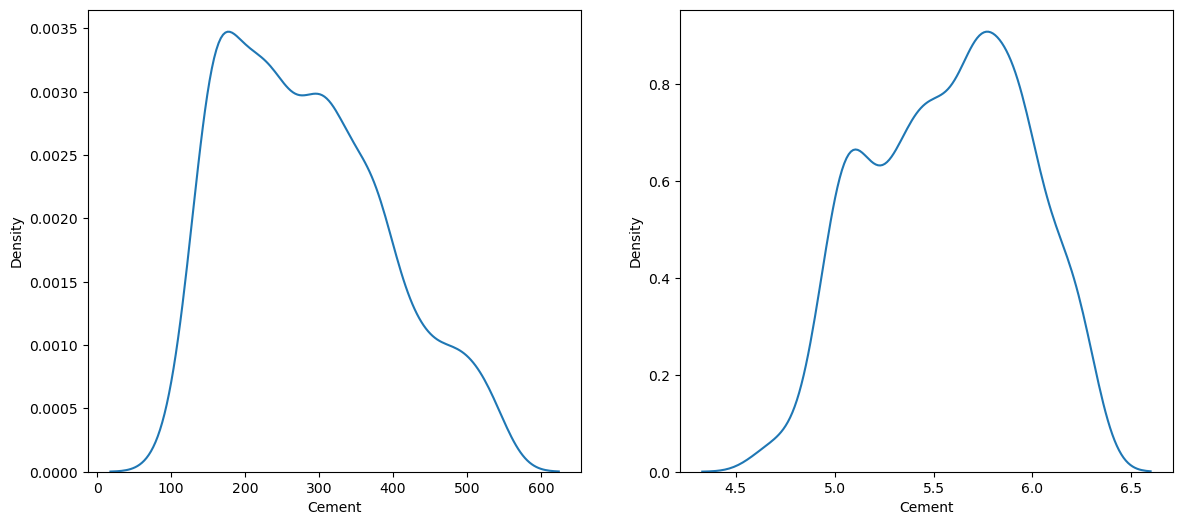

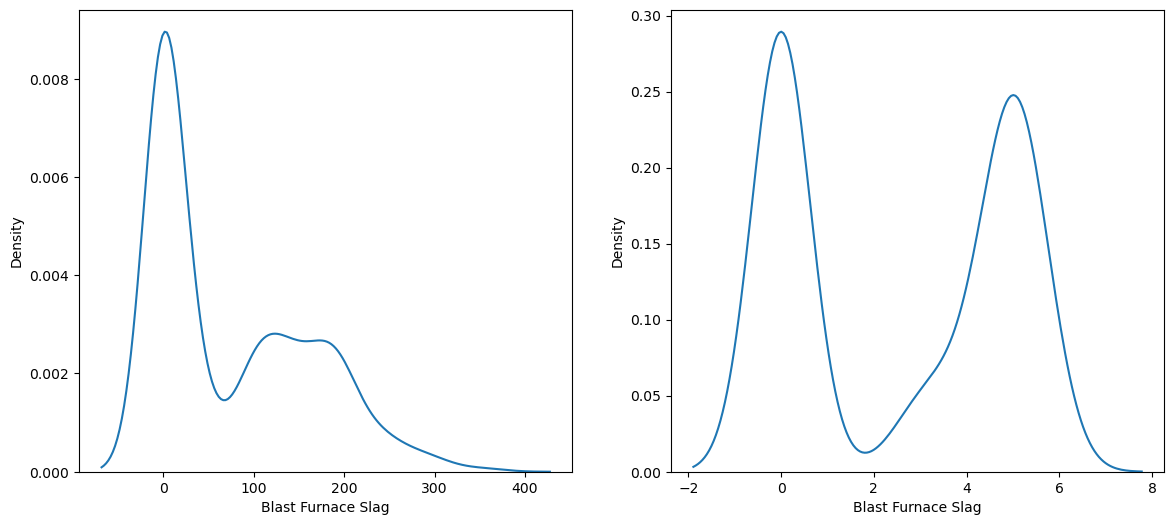

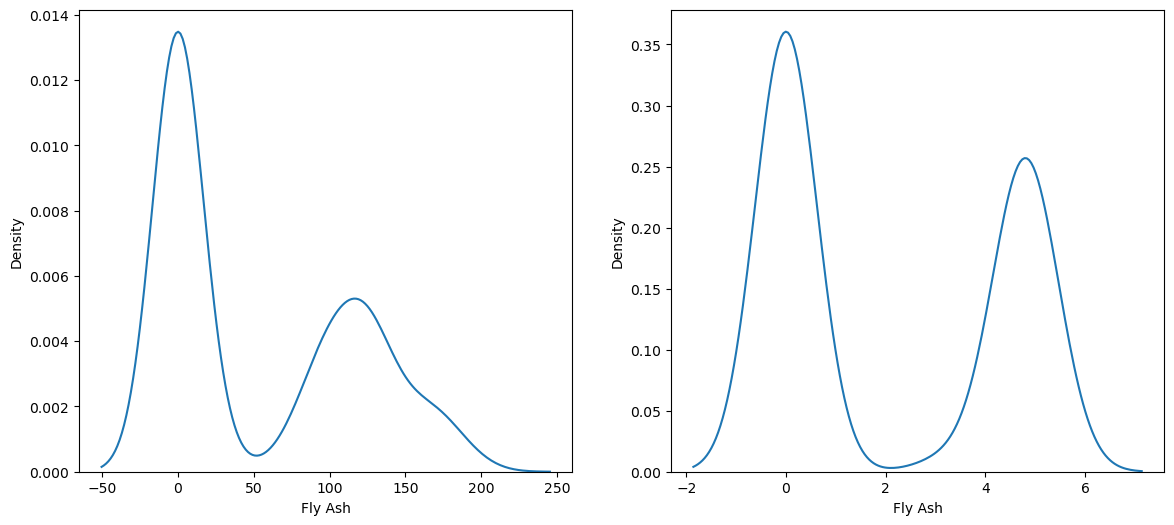

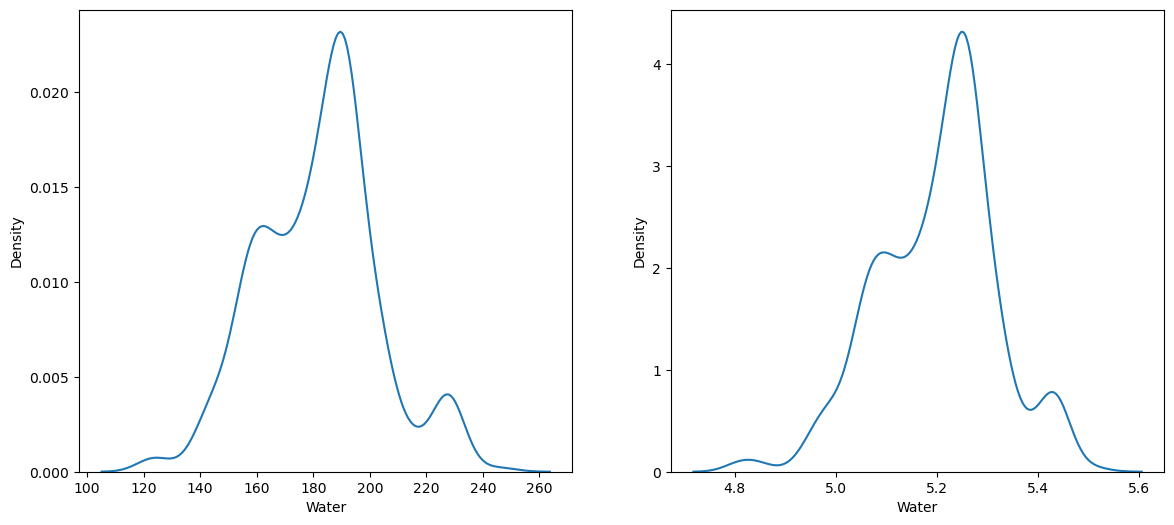

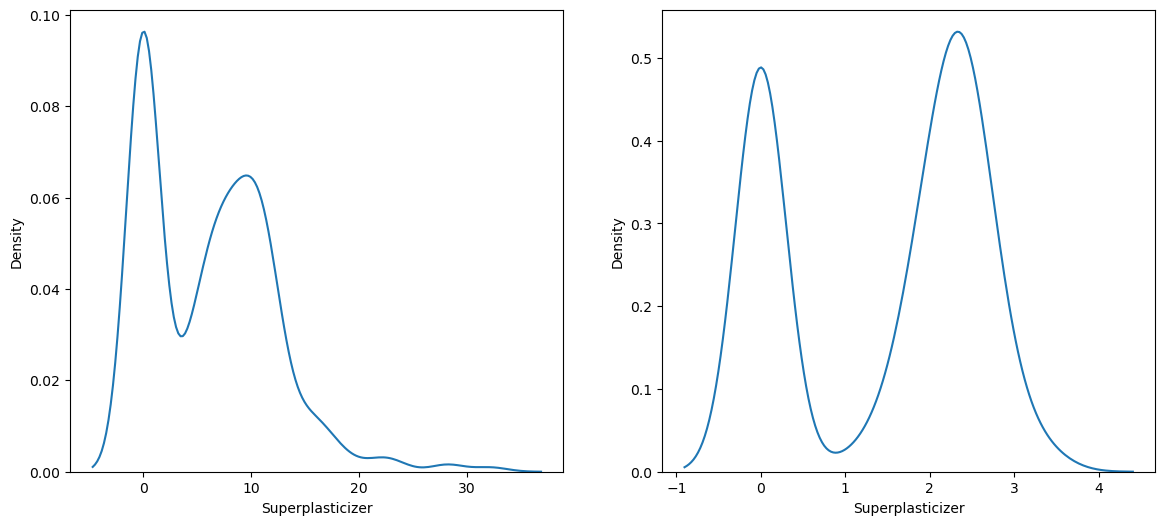

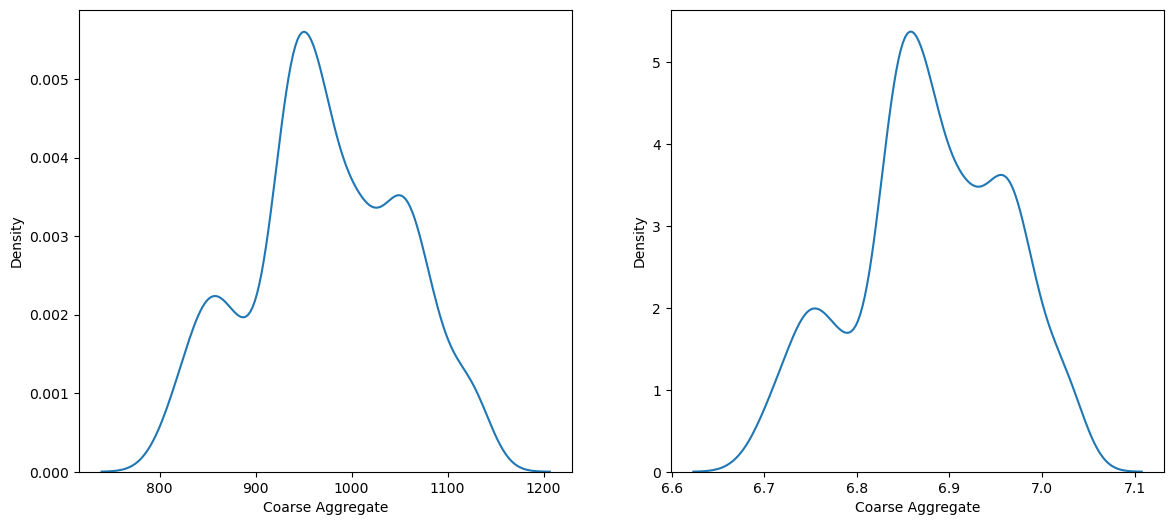

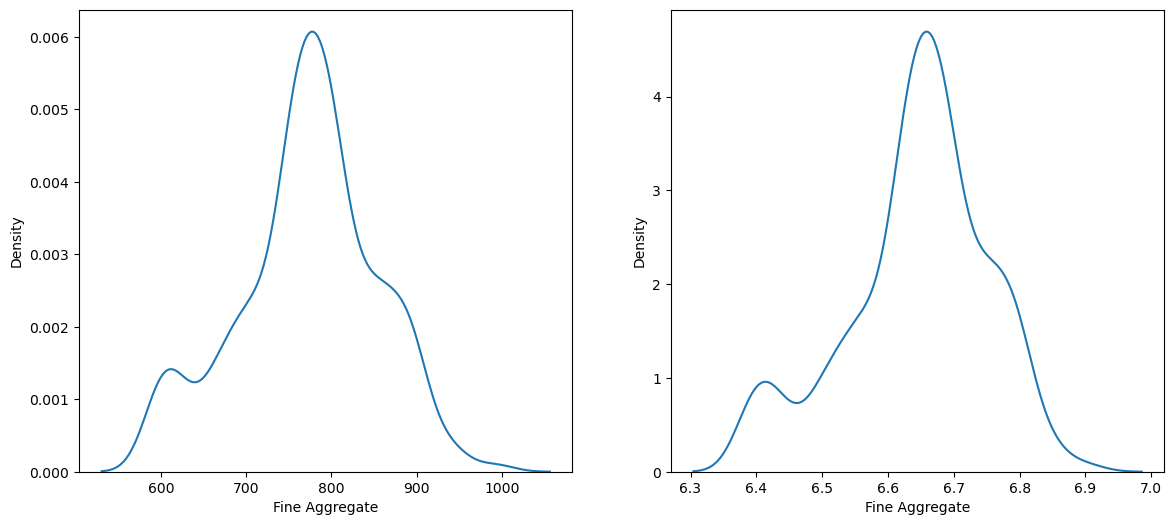

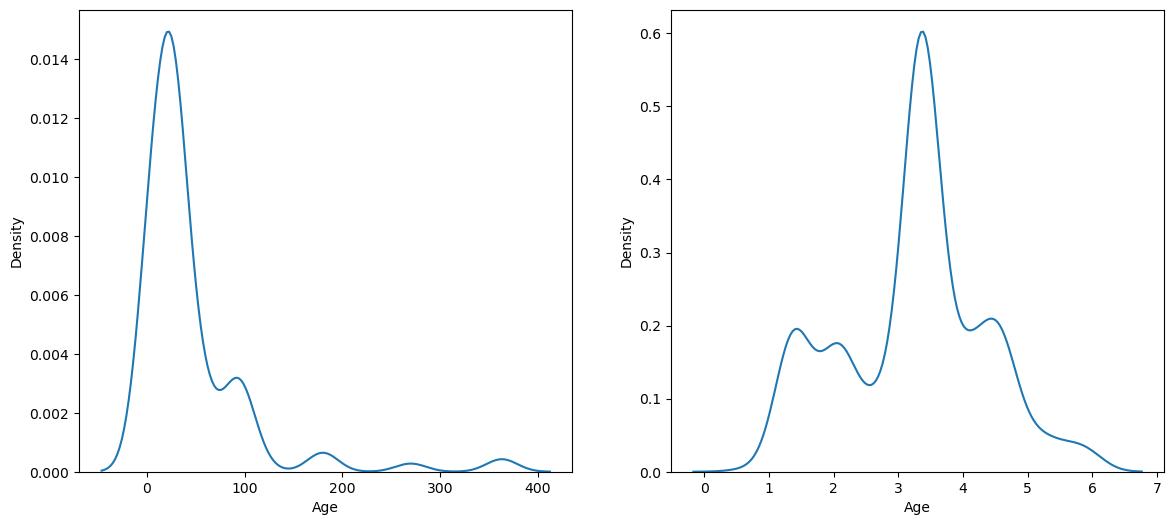

In [45]:
transform(np.log1p)

<h3>reciprocal</h3>
=> It is use to make the small values to big and big values to small.<br>
=> It's use is depend on data so just try it

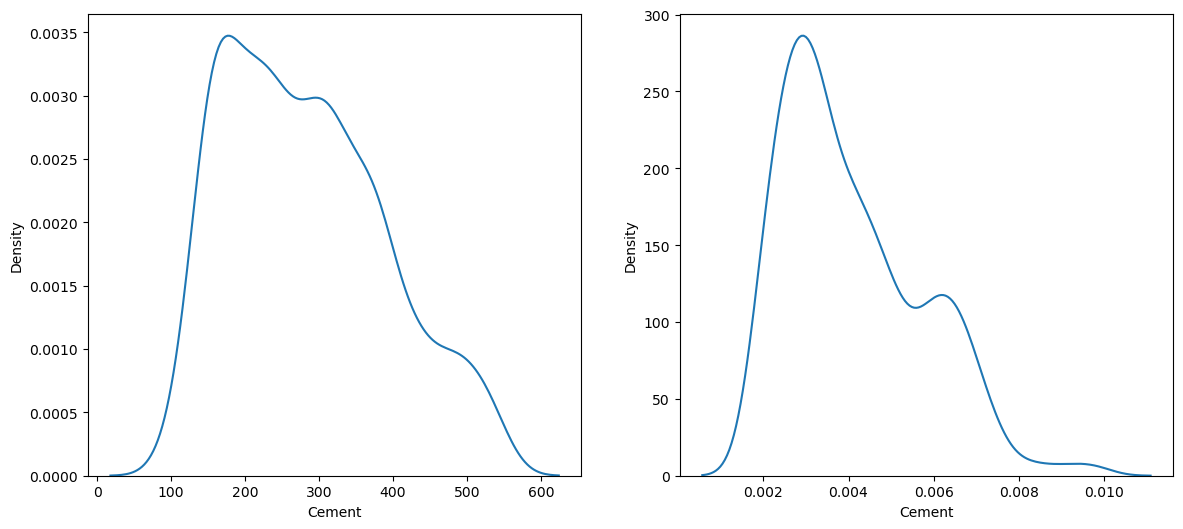

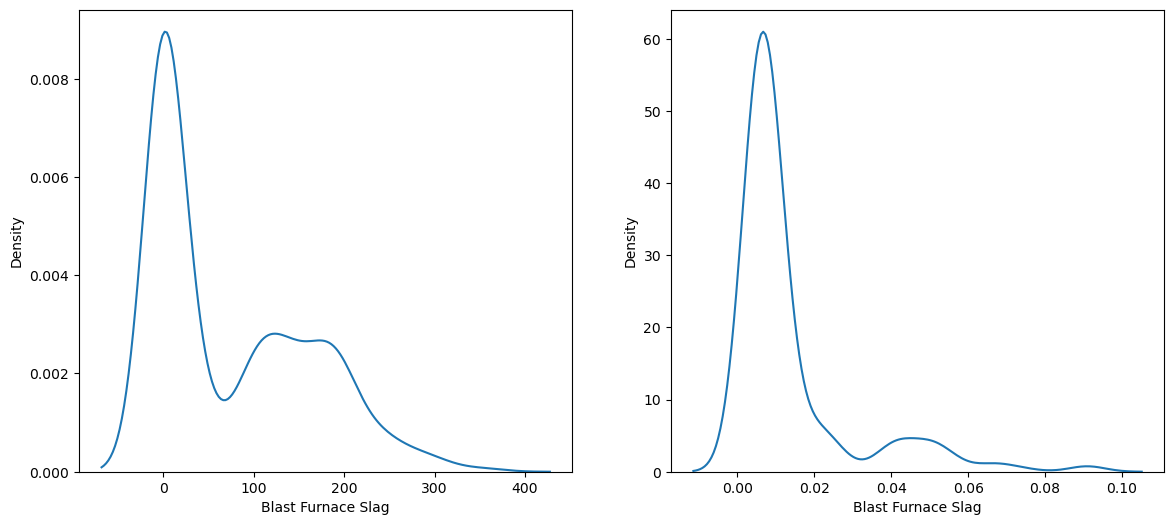

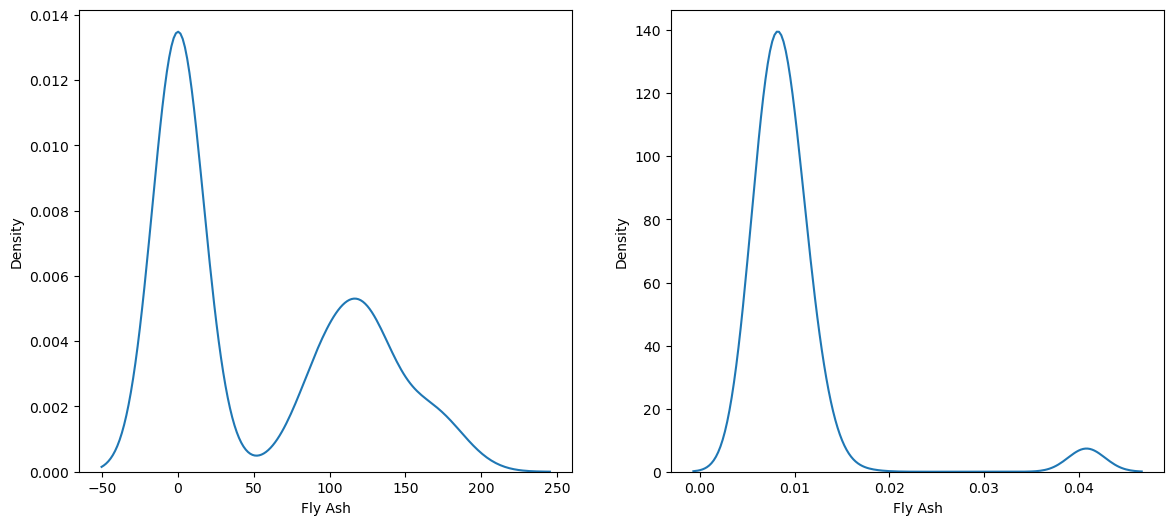

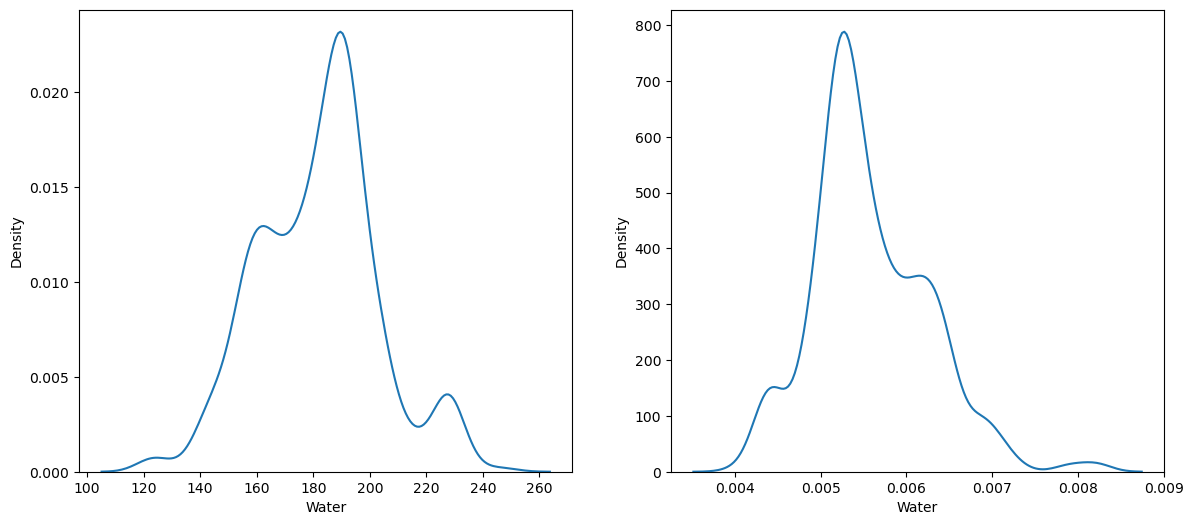

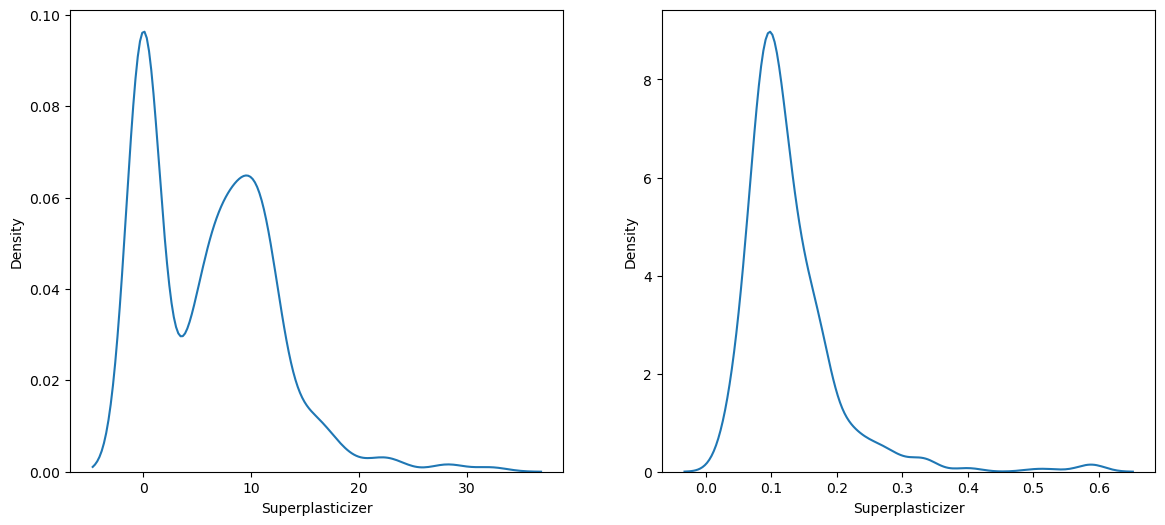

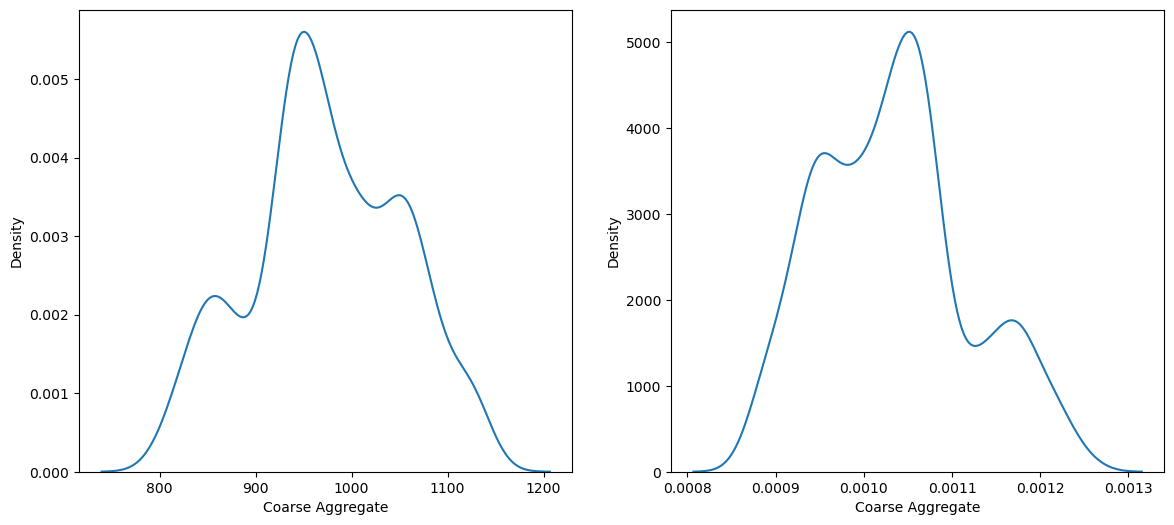

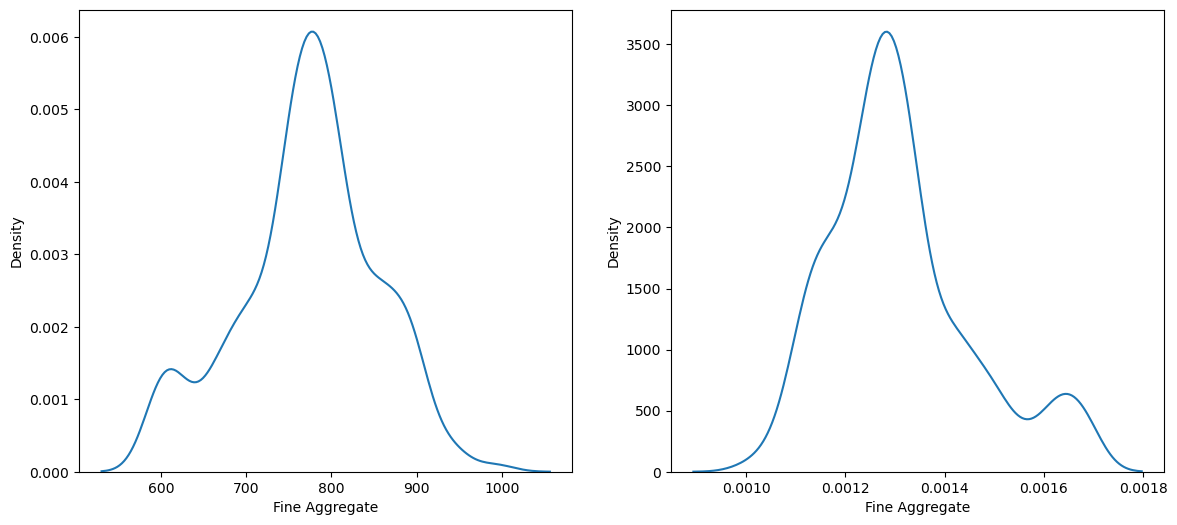

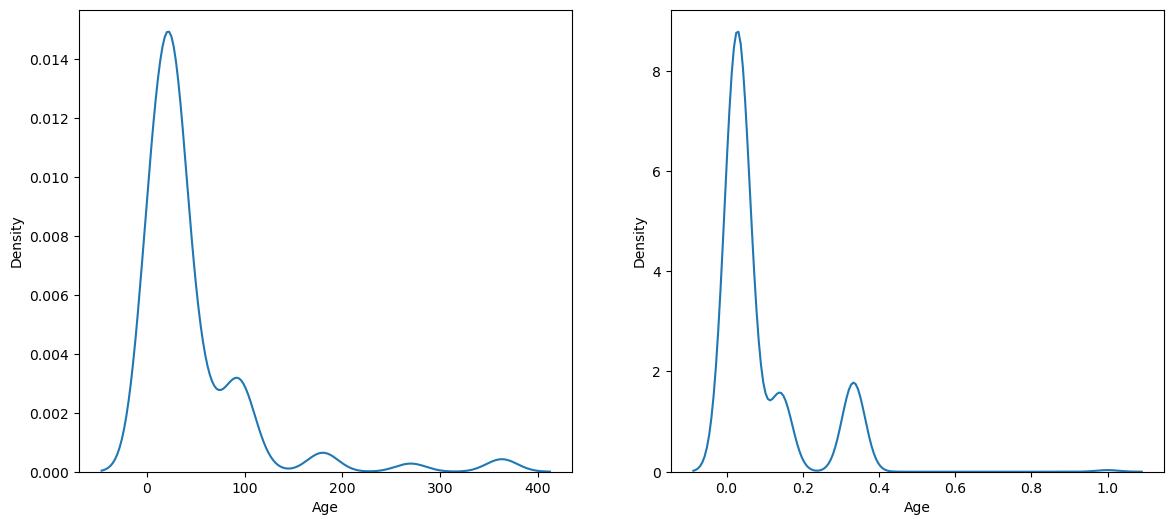

In [46]:
transform(lambda x:1/x)

<h3>Square</h3>
=> It is use when you have left skeww data and make it normal skew

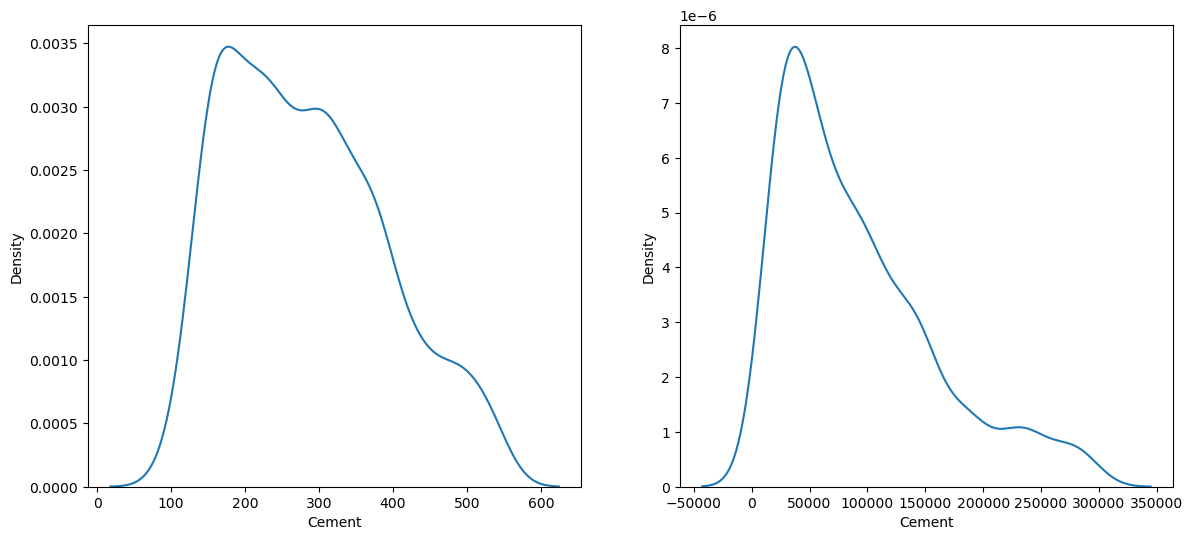

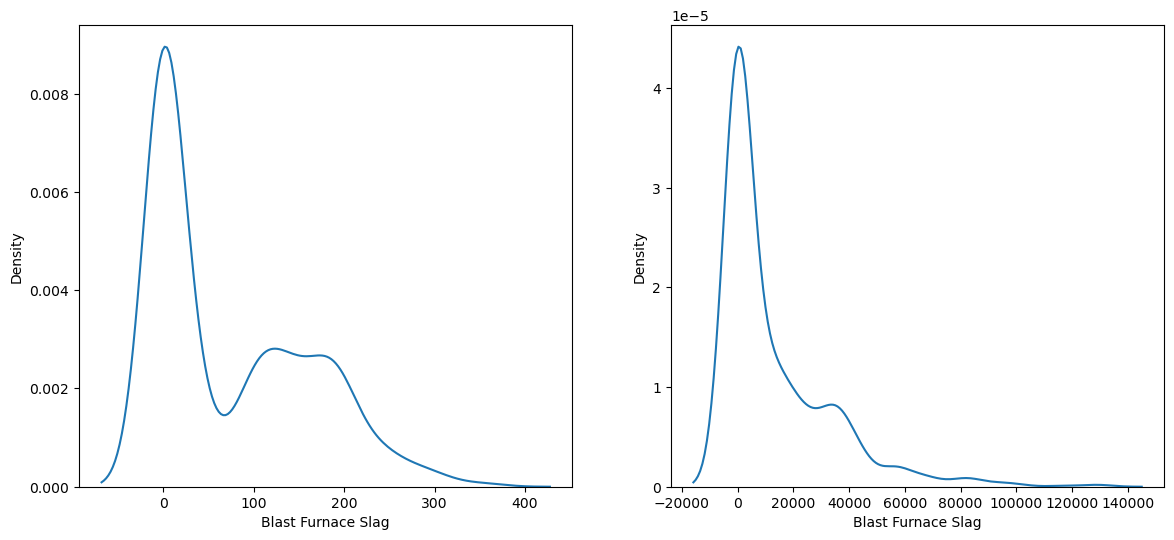

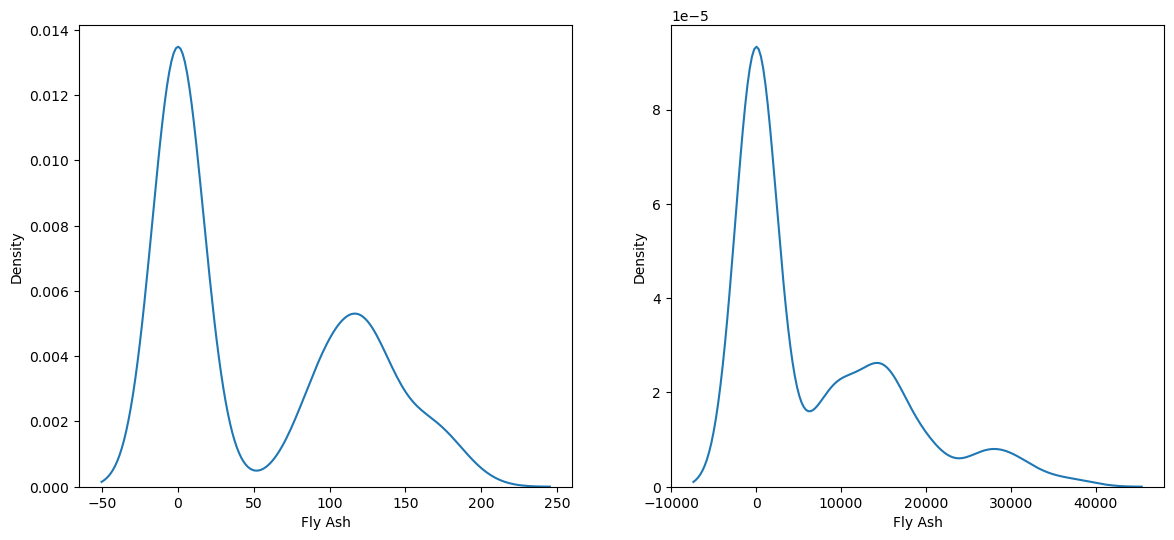

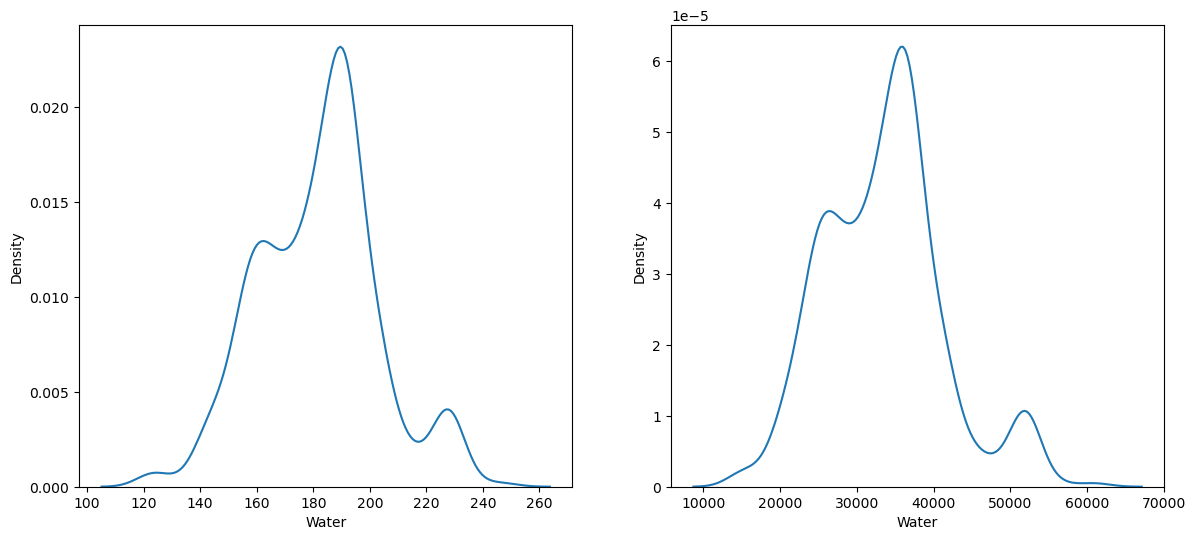

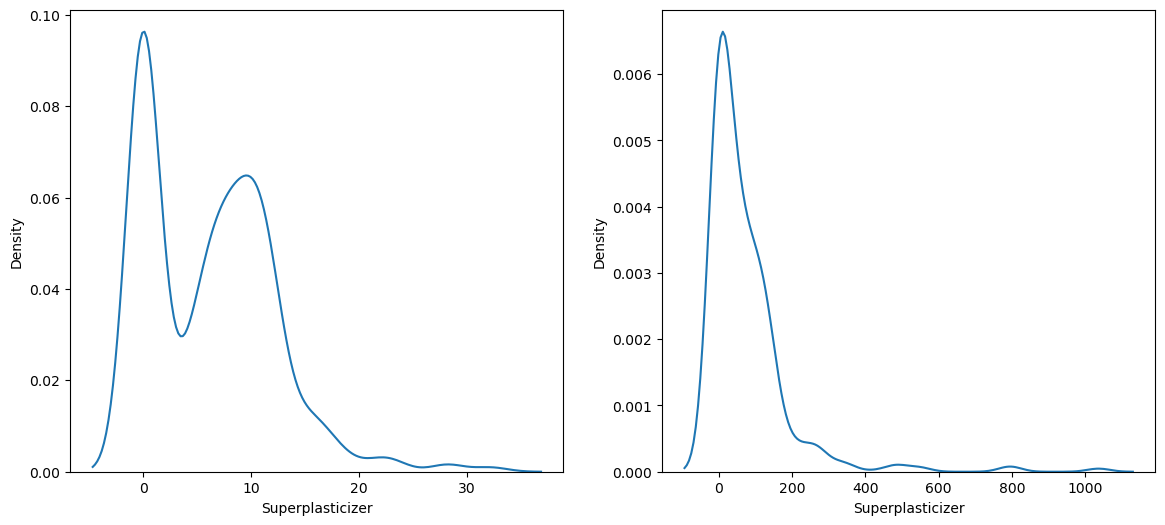

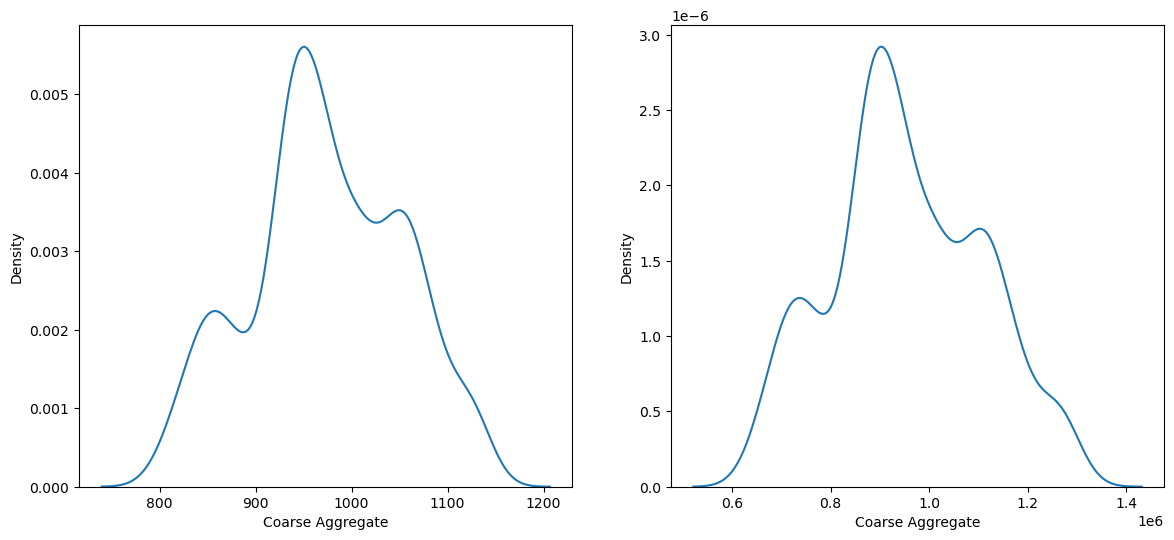

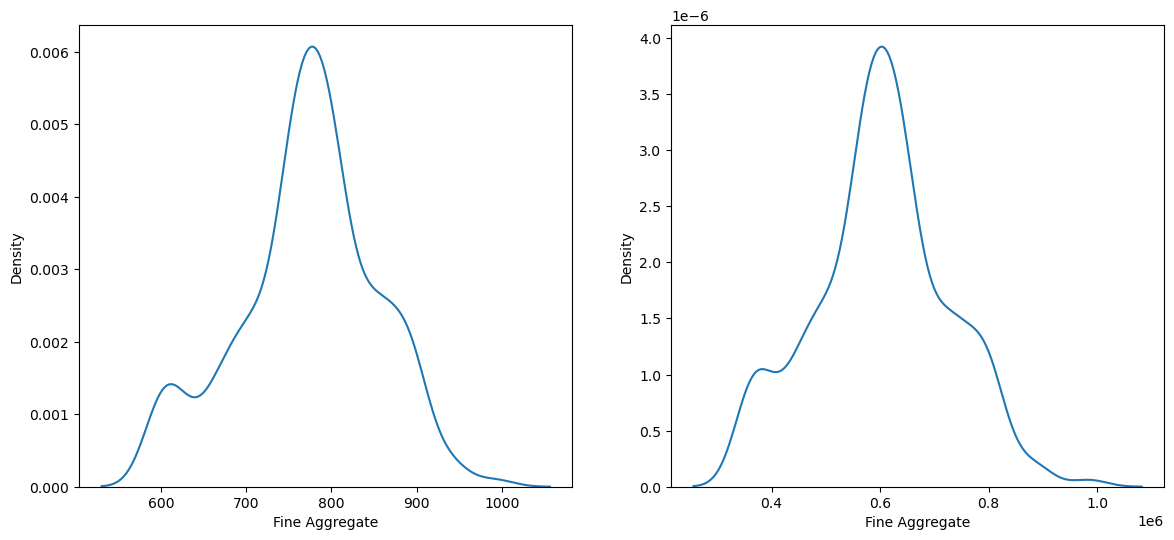

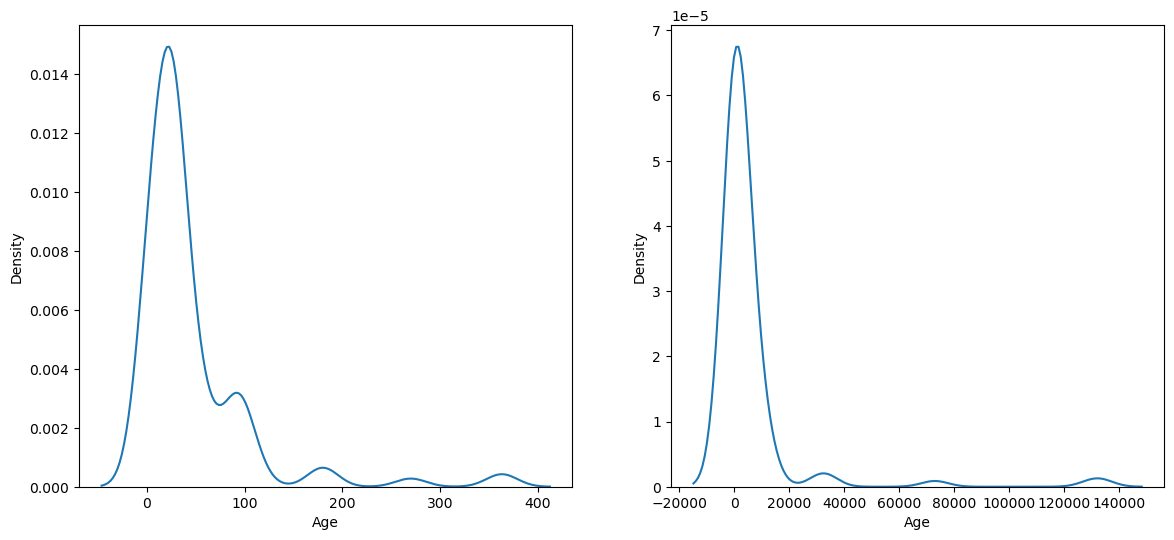

In [47]:
transform(lambda x:x*x)

<h3>Squre Root</h3>

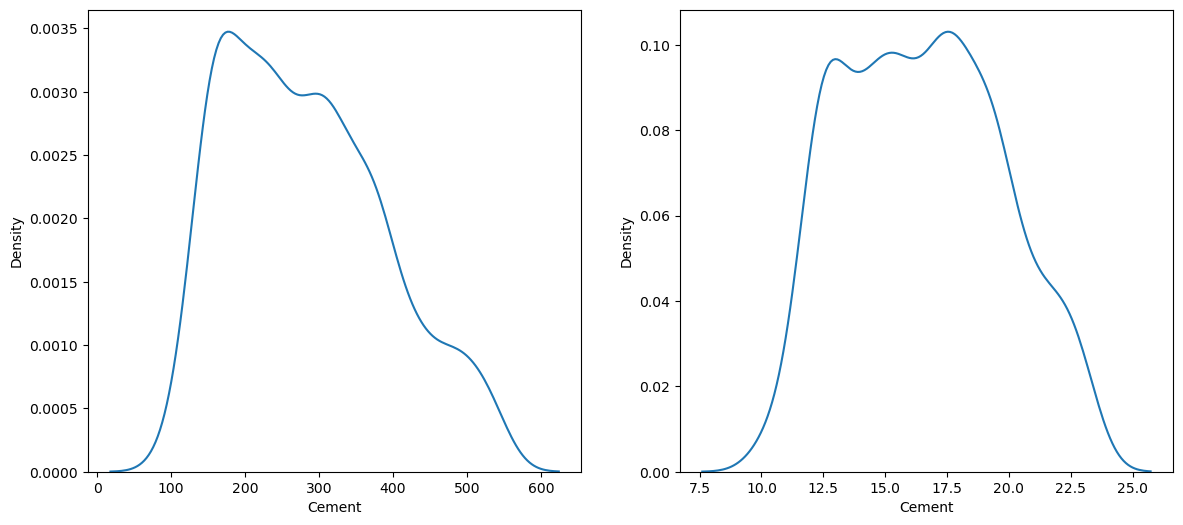

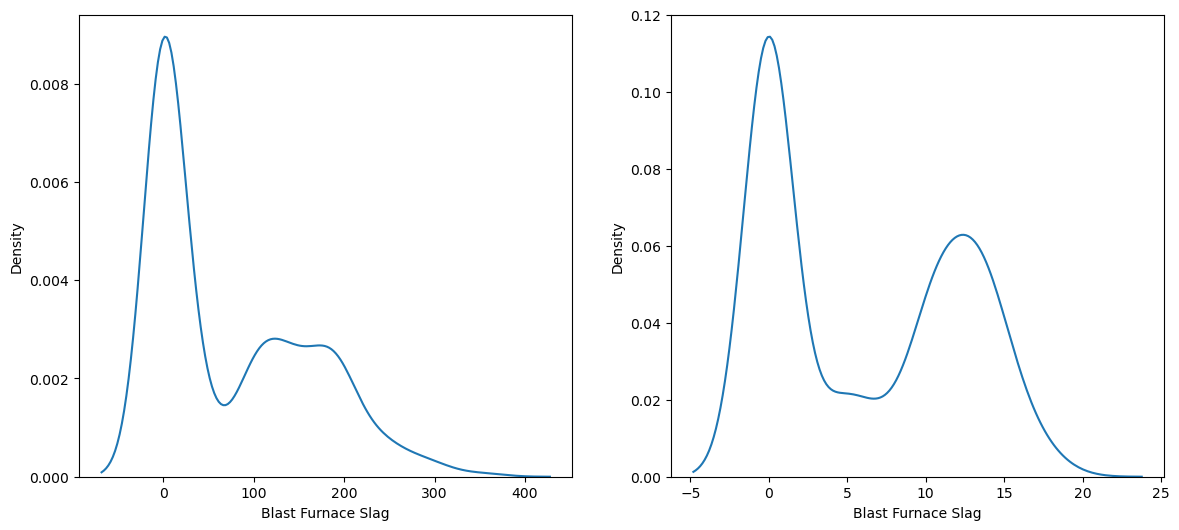

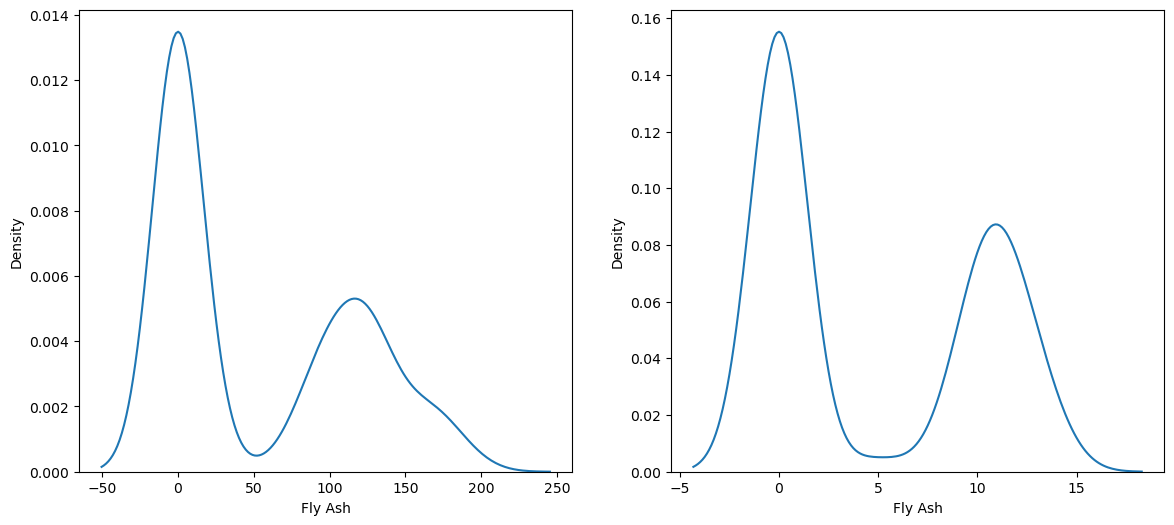

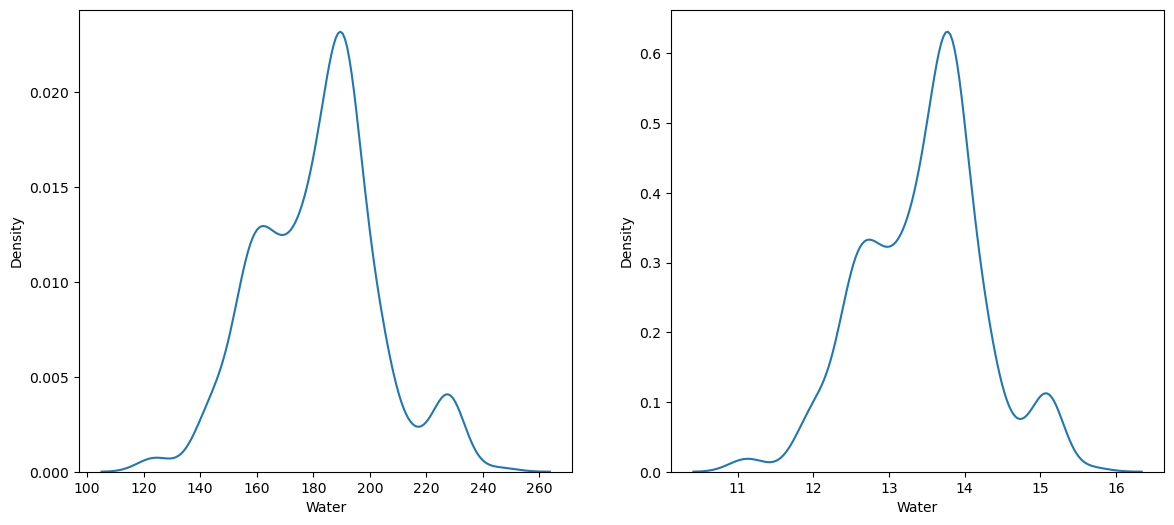

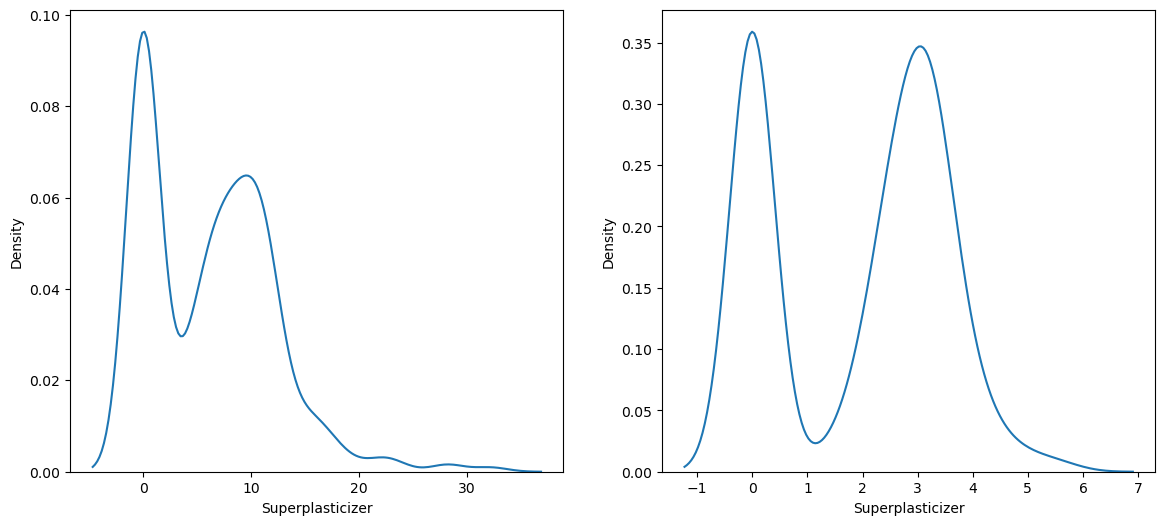

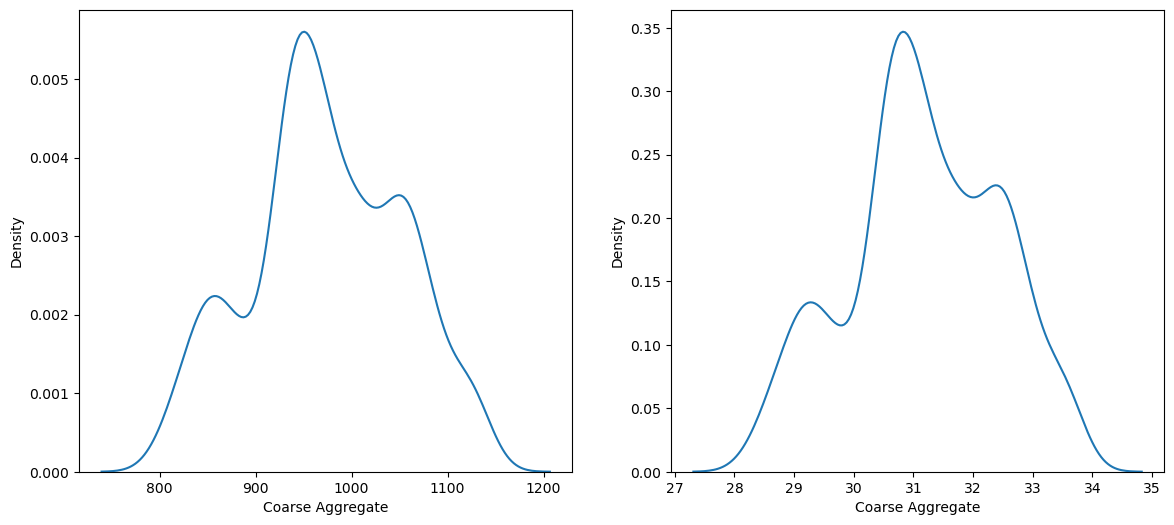

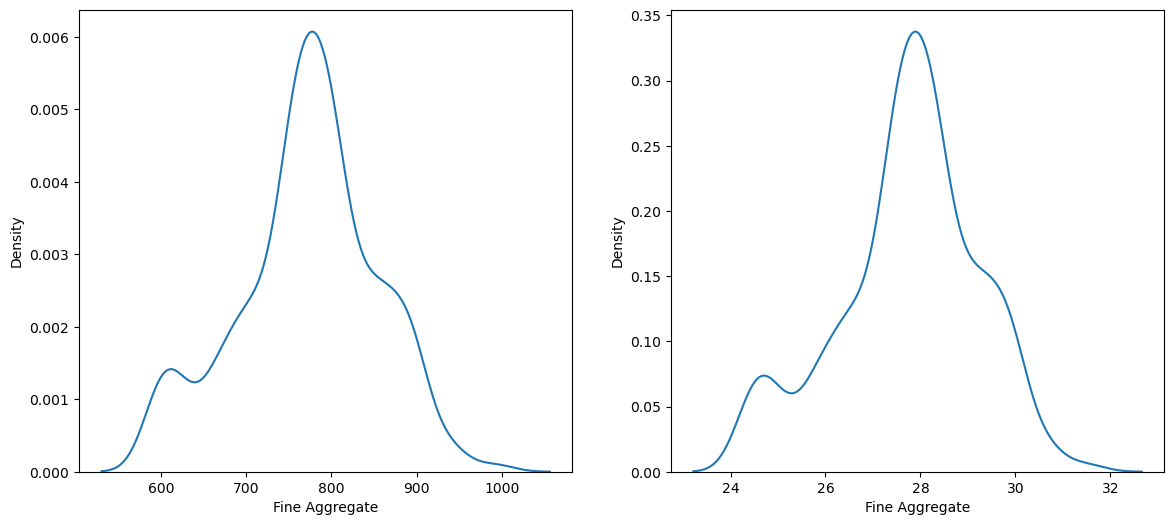

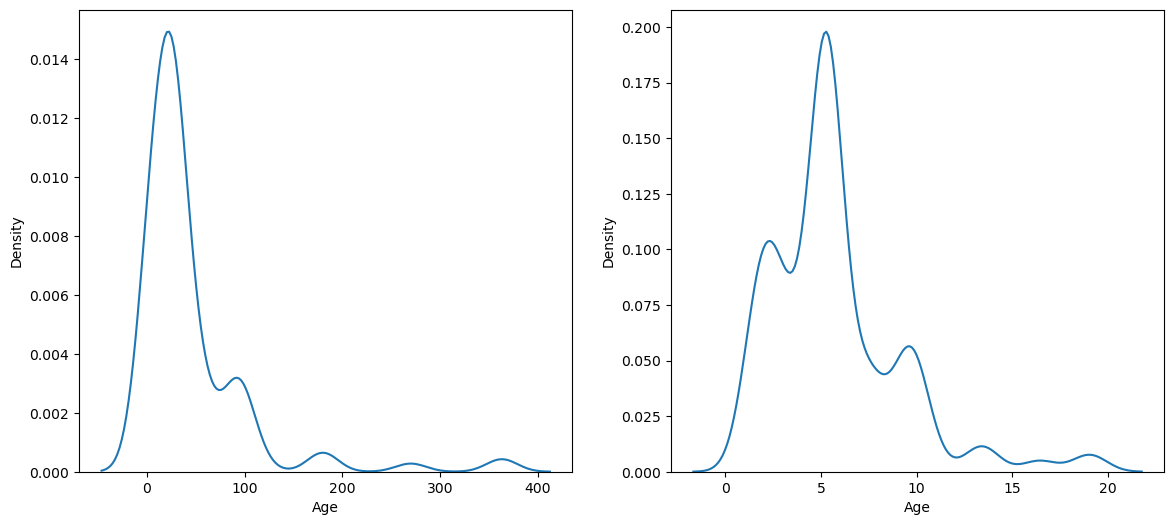

In [51]:
transform(lambda x:np.sqrt(x))